<a href="https://colab.research.google.com/github/sweyy/sweyy/blob/main/house_price_predictions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#  Importing Dependencies


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
from pandas.plotting import scatter_matrix
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import plotly.express as px
import plotly.offline as py
from scipy import stats

%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

## Getting Data

In [2]:
df=pd.read_csv('/content/housing.csv.zip')

In [3]:
df.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


**Find district for each catagory of ocean_proximity**

In [5]:
df["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [6]:
#describe will show the summary of numerical data

df.describe()

longitude      latitude  housing_median_age   total_rooms  \
count  20640.000000  20640.000000        20640.000000  20640.000000   
mean    -119.569704     35.631861           28.639486   2635.763081   
std        2.003532      2.135952           12.585558   2181.615252   
min     -124.350000     32.540000            1.000000      2.000000   
25%     -121.800000     33.930000           18.000000   1447.750000   
50%     -118.490000     34.260000           29.000000   2127.000000   
75%     -118.010000     37.710000           37.000000   3148.000000   
max     -114.310000     41.950000           52.000000  39320.000000   

       total_bedrooms    population    households  median_income  \
count    20433.000000  20640.000000  20640.000000   20640.000000   
mean       537.870553   1425.476744    499.539680       3.870671   
std        421.385070   1132.462122    382.329753       1.899822   
min          1.000000      3.000000      1.000000       0.499900   
25%        296.000000    787.000000    280.000000       2.563400   
50%        435.000000   1166.000000    409.000000       3.534800   
75%        647.000000   1725.000000    605.000000       4.743250   
max       6445.000000  35682.000000   6082.000000      15.000100   

       median_house_value  
count        20640.000000  
mean        206855.816909  
std         115395.615874  
min          14999.000000  
25%         119600.000000  
50%         179700.000000  
75%         264725.000000  
max         500001.000000

# Histplot (Histogram Plot)


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

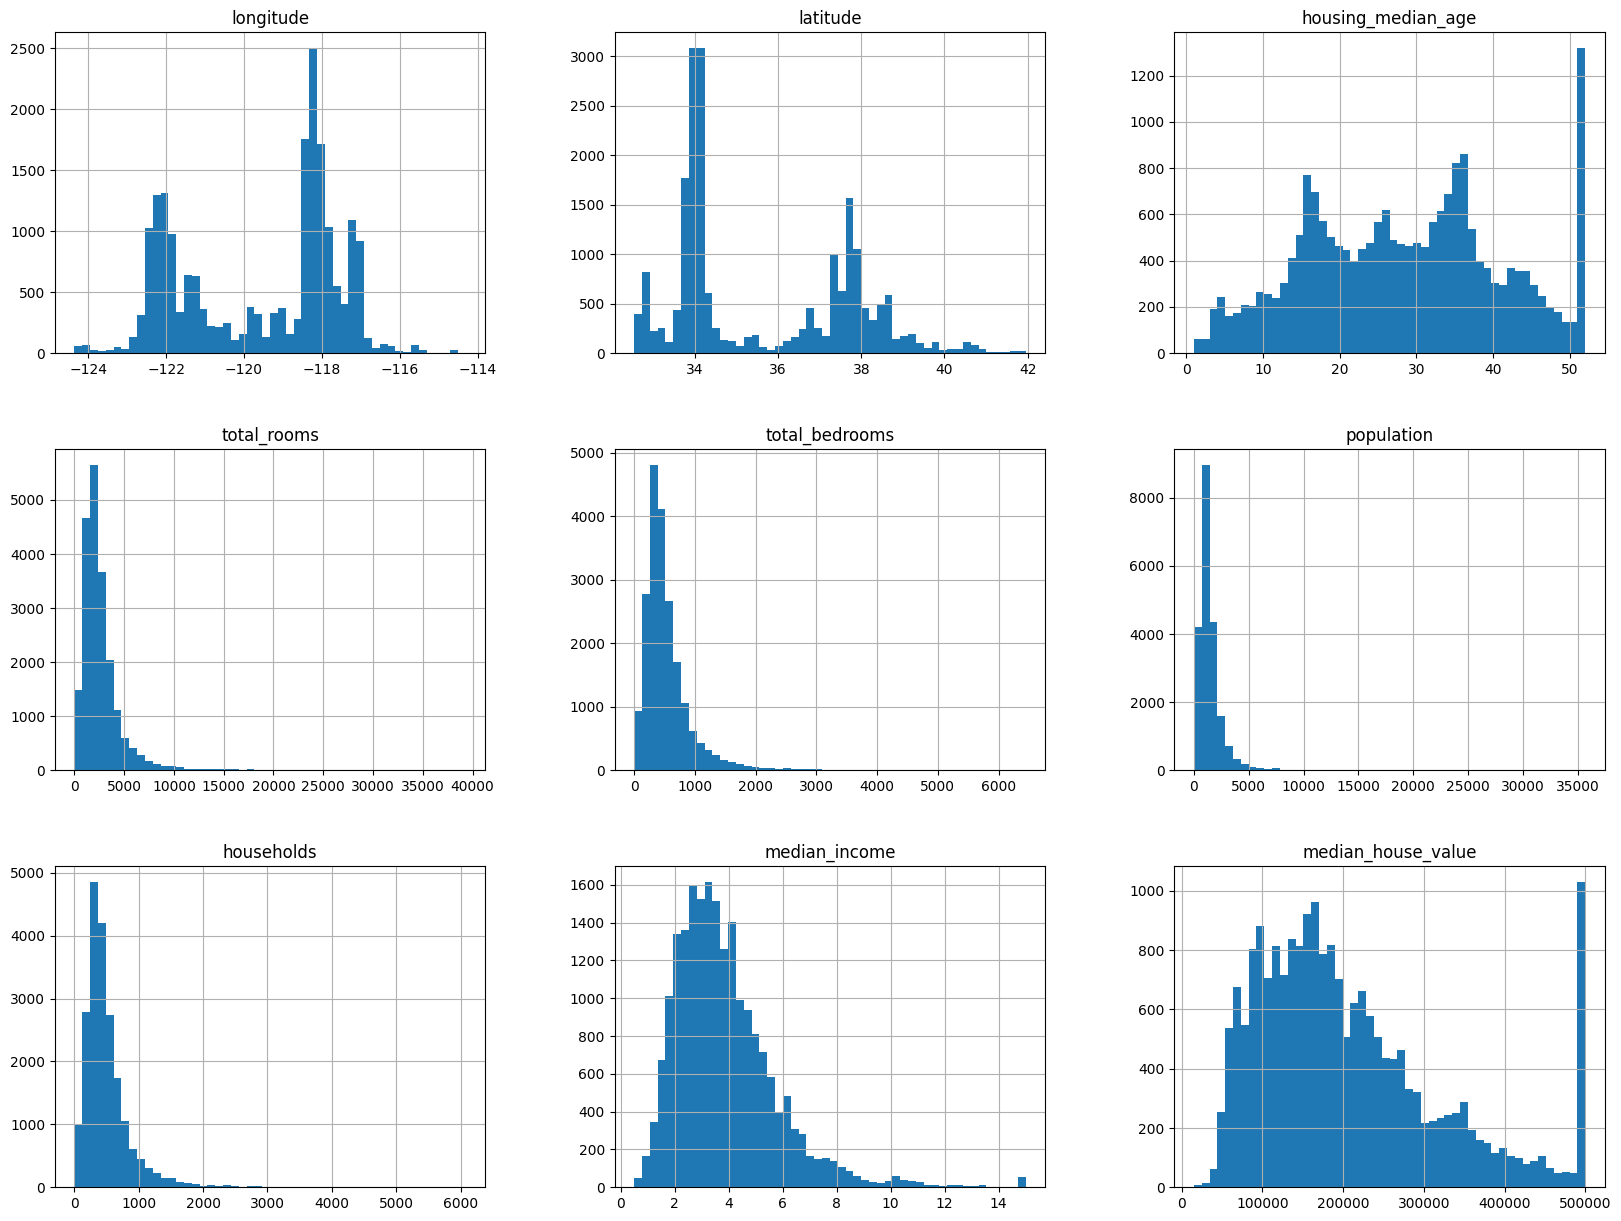

In [7]:
#lets plot a histogram for no. of instances

df.hist(bins=50,figsize=(20,15))

In [8]:
#creating test data

train_set, test_set = train_test_split(df,test_size=0.2,random_state=42)

In [9]:
len(test_set)

4128

In [10]:
df["income_cat"]=pd.cut(df["median_income"],bins=[0., 1.5,3.0,4.5,6.,np.inf],labels=[1,2,3,4,5])

<Axes: >

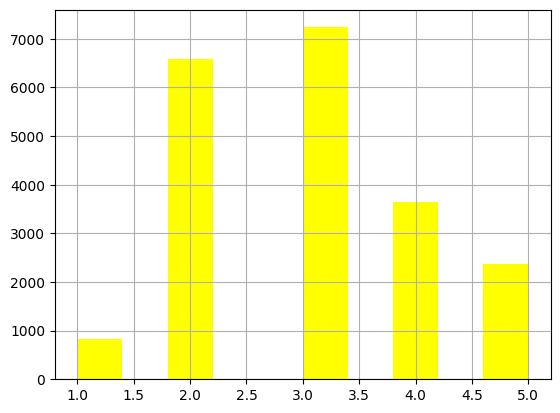

In [12]:
df["income_cat"].hist(color='yellow')

In [13]:
#creating a StratifiedShuffleSplit

split=StratifiedShuffleSplit(n_splits=1,test_size=0.2,random_state=42)
for train_index, test_index in split.split(df,df["income_cat"]):
    strat_train = df.loc[train_index]
    strat_test = df.loc[test_index]

In [14]:
strat_test["income_cat"].value_counts()/len(strat_test)

3    0.350533
2    0.318798
4    0.176357
5    0.114341
1    0.039971
Name: income_cat, dtype: float64

In [15]:
#removing income cat

for set_ in (strat_train,strat_test):
    set_.drop("income_cat",axis=1,inplace=True)

# Data Visualizations & Gain Insights 📈

In [16]:
#making copy for the data

data=strat_train.copy()

#  Scatterplot


<Axes: xlabel='longitude', ylabel='latitude'>

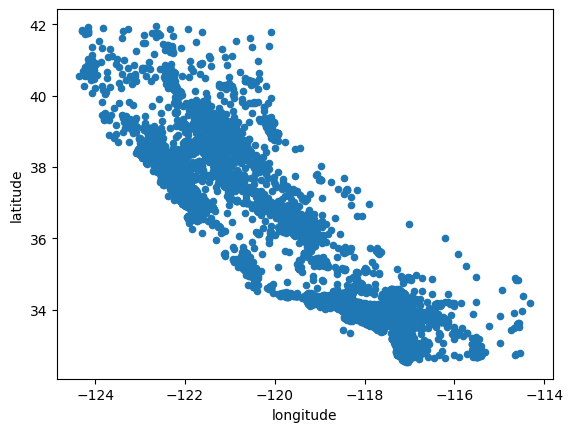

In [17]:
data.plot(kind="scatter",x="longitude",y="latitude")

<Axes: xlabel='longitude', ylabel='latitude'>

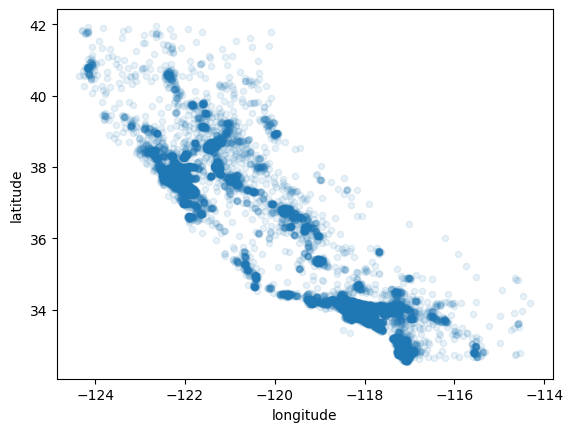

In [18]:
data.plot(kind="scatter",x="longitude",y="latitude",alpha=0.1)

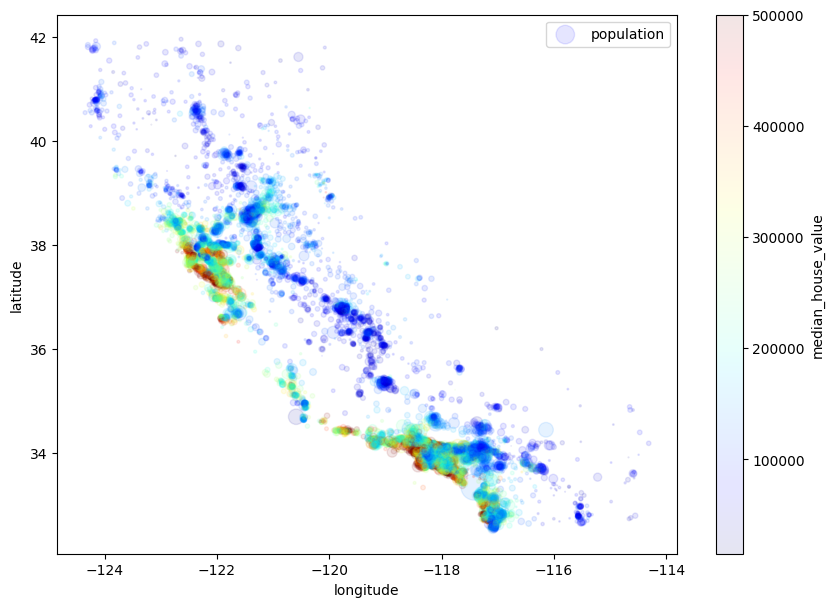

In [19]:
data.plot(kind="scatter",x="longitude",y="latitude",alpha=0.1,
            s=data["population"]/100, label="population", figsize=(10,7),
         c="median_house_value",cmap=plt.get_cmap("jet"),colorbar=True
)
plt.legend()

In [20]:
# Correlations

corr=data.corr()
corr

longitude  latitude  housing_median_age  total_rooms  \
longitude            1.000000 -0.924478           -0.105823     0.048909   
latitude            -0.924478  1.000000            0.005737    -0.039245   
housing_median_age  -0.105823  0.005737            1.000000    -0.364535   
total_rooms          0.048909 -0.039245           -0.364535     1.000000   
total_bedrooms       0.076686 -0.072550           -0.325101     0.929391   
population           0.108071 -0.115290           -0.298737     0.855103   
households           0.063146 -0.077765           -0.306473     0.918396   
median_income       -0.019615 -0.075146           -0.111315     0.200133   
median_house_value  -0.047466 -0.142673            0.114146     0.135140   

                    total_bedrooms  population  households  median_income  \
longitude                 0.076686    0.108071    0.063146      -0.019615   
latitude                 -0.072550   -0.115290   -0.077765      -0.075146   
housing_median_age       -0.325101   -0.298737   -0.306473      -0.111315   
total_rooms               0.929391    0.855103    0.918396       0.200133   
total_bedrooms            1.000000    0.876324    0.980167      -0.009643   
population                0.876324    1.000000    0.904639       0.002421   
households                0.980167    0.904639    1.000000       0.010869   
median_income            -0.009643    0.002421    0.010869       1.000000   
median_house_value        0.047781   -0.026882    0.064590       0.687151   

                    median_house_value  
longitude                    -0.047466  
latitude                     -0.142673  
housing_median_age            0.114146  
total_rooms                   0.135140  
total_bedrooms                0.047781  
population                   -0.026882  
households                    0.064590  
median_income                 0.687151  
median_house_value            1.000000

In [21]:
corr["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687151
total_rooms           0.135140
housing_median_age    0.114146
households            0.064590
total_bedrooms        0.047781
population           -0.026882
longitude            -0.047466
latitude             -0.142673
Name: median_house_value, dtype: float64

#  Heatmap


<Axes: >

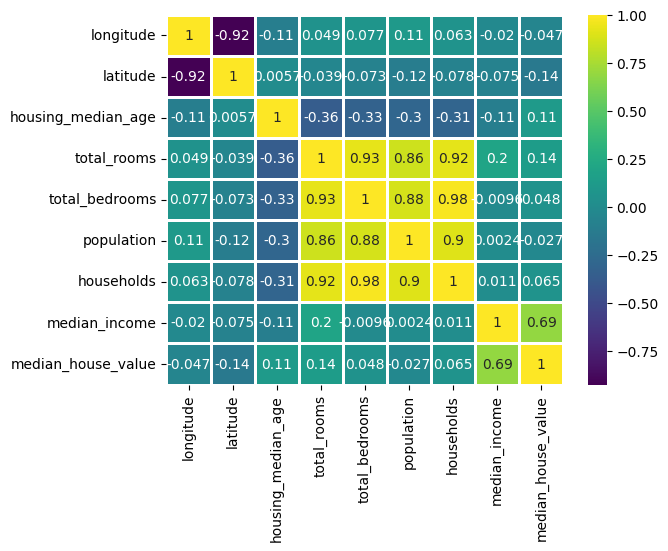

In [22]:
sns.heatmap(corr,annot=True,linewidths=1,cmap="viridis")

# **bold text**#  MapPlot

In [23]:
py.init_notebook_mode(connected=True)
map=px.scatter_mapbox(data,
                      lat='latitude',
                      lon='longitude',
                      color='median_house_value',
                      size='population',
                      hover_name='ocean_proximity',
                      zoom=4,
                      height=1000)
map.update_layout(mapbox_style='open-street-map')
map.show()

## Scatterplot


array([[<Axes: xlabel='median_house_value', ylabel='median_house_value'>,
        <Axes: xlabel='median_income', ylabel='median_house_value'>,
        <Axes: xlabel='total_rooms', ylabel='median_house_value'>,
        <Axes: xlabel='housing_median_age', ylabel='median_house_value'>],
       [<Axes: xlabel='median_house_value', ylabel='median_income'>,
        <Axes: xlabel='median_income', ylabel='median_income'>,
        <Axes: xlabel='total_rooms', ylabel='median_income'>,
        <Axes: xlabel='housing_median_age', ylabel='median_income'>],
       [<Axes: xlabel='median_house_value', ylabel='total_rooms'>,
        <Axes: xlabel='median_income', ylabel='total_rooms'>,
        <Axes: xlabel='total_rooms', ylabel='total_rooms'>,
        <Axes: xlabel='housing_median_age', ylabel='total_rooms'>],
       [<Axes: xlabel='median_house_value', ylabel='housing_median_age'>,
        <Axes: xlabel='median_income', ylabel='housing_median_age'>,
        <Axes: xlabel='total_rooms', ylabel='housi

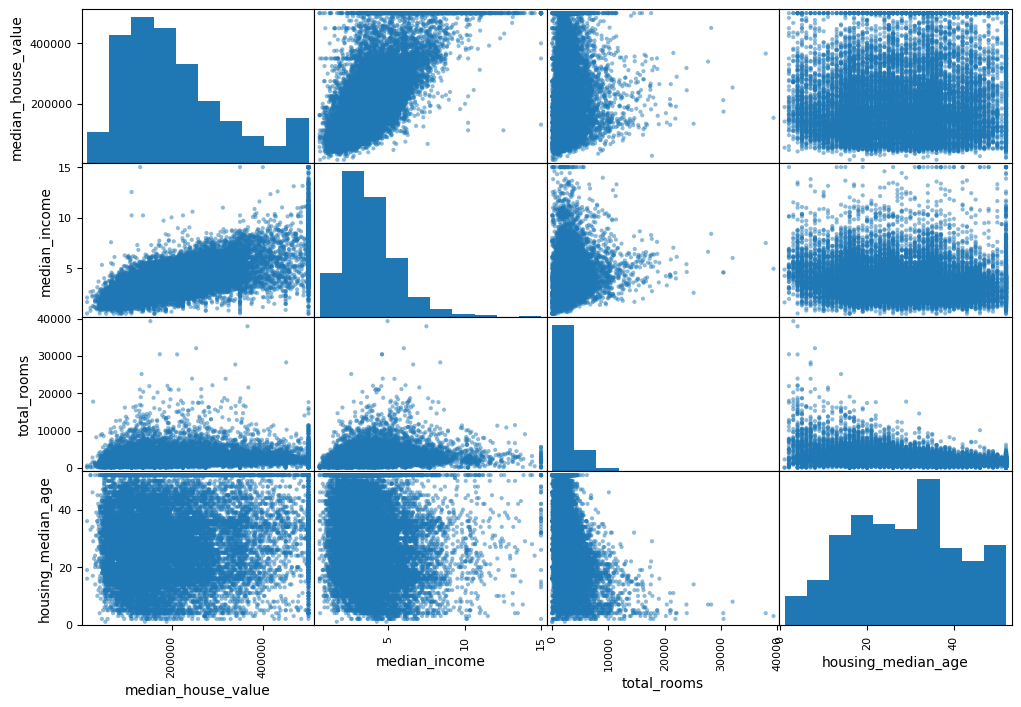

In [24]:
#another method for checking Correlations using python is scatter_matrix

att=["median_house_value","median_income","total_rooms","housing_median_age"]
scatter_matrix(data[att],figsize=(12,8))

<Axes: xlabel='median_income', ylabel='median_house_value'>

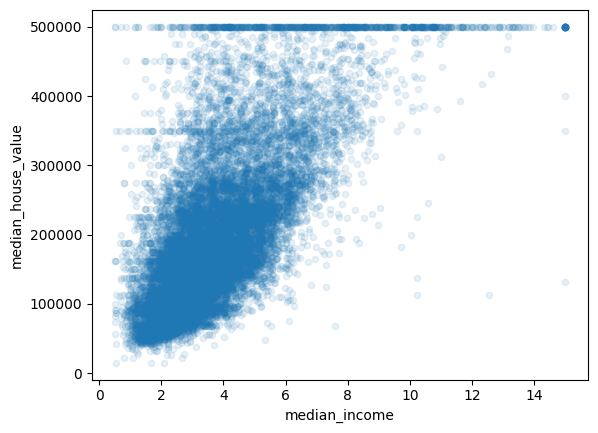

In [25]:
data.plot(kind="scatter",x="median_income",y="median_house_value",alpha=0.1)

**Observations:- The correlation is indeed very strong**

In [26]:
#now lets create more attributes for better understanding

data["room_per_house"]=data["total_rooms"]/data["households"]
data["bedroom_per_room"]=data["total_bedrooms"]/data["total_rooms"]
data["pop_per_house"]=data["population"]/data["households"]

In [27]:
corr=data.corr()
corr["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687151
room_per_house        0.146255
total_rooms           0.135140
housing_median_age    0.114146
households            0.064590
total_bedrooms        0.047781
pop_per_house        -0.021991
population           -0.026882
longitude            -0.047466
latitude             -0.142673
bedroom_per_room     -0.259952
Name: median_house_value, dtype: float64

**Here is new correlation matrix**

bedroom_per_room is more correlated with median house value

# **Data Cleaning**

In [28]:
info=strat_train.drop("median_house_value",axis=1)
info_labels = strat_train["median_house_value"].copy()

In [30]:
# Null Values Check
if info.isnull().values.any():
    print("null replace !!")

null replace !!


#  Simple Imputer


In [31]:
# dropna(), drop(), fillna()
#going with simpleimputer

info_num = info.drop("ocean_proximity", axis=1)  #numerical data only

impute = SimpleImputer(strategy = "median")
impute.fit(info_num)

SimpleImputer(strategy='median')

In [35]:
impute.statistics_

array([-118.51   ,   34.26   ,   29.     , 2119.     ,  433.     ,
       1164.     ,  408.     ,    3.54155])

In [36]:
info_num.median().values

array([-118.51   ,   34.26   ,   29.     , 2119.     ,  433.     ,
       1164.     ,  408.     ,    3.54155])

In [34]:
x=impute.transform(info_num)  #plane numpy array
info_tr=pd.DataFrame(x,columns=info_num.columns,index=info_num.index)   #converting in pd Dataframe

# **Handling Text & Categorical Attributes**

In [38]:
info_cat=info[["ocean_proximity"]]
info_cat.head(10)

ocean_proximity
12655          INLAND
15502      NEAR OCEAN
2908           INLAND
14053      NEAR OCEAN
20496       <1H OCEAN
1481         NEAR BAY
18125       <1H OCEAN
5830        <1H OCEAN
17989       <1H OCEAN
4861        <1H OCEAN

# OneHot Encoder


In [39]:
#converting to numerical data using OneHotEncoder

ohe=OneHotEncoder()
info_cat_1hot=ohe.fit_transform(info_cat)
info_cat_1hot[:10]

<10x5 sparse matrix of type '<class 'numpy.float64'>'
	with 10 stored elements in Compressed Sparse Row format>

In [40]:
info_cat_1hot.toarray()  #converting it to dense numpy array

array([[0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       ...,
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

In [41]:
ohe.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

# Transformers

In [42]:
#Custom Transformers

rooms_ix, bedrooms_ix, population_ix, households_ix = 3, 4, 5, 6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
 def __init__(self, add_bedrooms_per_room = True):
    self.add_bedrooms_per_room = add_bedrooms_per_room
 def fit(self, X, y=None):
    return self # nothing else to do
 def transform(self, X):
    room_per_house = X[:, rooms_ix] / X[:, households_ix]
    pop_per_house = X[:, population_ix] / X[:, households_ix]
    if self.add_bedrooms_per_room:
        bedroom_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
        return np.c_[X, room_per_house, pop_per_house,
                     bedroom_per_room]
    else:
        return np.c_[X, room_per_house, pop_per_house]

attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
info_extra_att = attr_adder.transform(info.values)




```
## This is formatted as code
```

# Pipelines

In [43]:
# Pipeline

num_pipeline = Pipeline([
    ('impute', SimpleImputer(strategy="median")),
    ('attr_adder', CombinedAttributesAdder()),
    ('std_scaler', StandardScaler()),
])

info_num_tr = num_pipeline.fit_transform(info_num)

In [44]:
num_att= list(info_num)
cat_att= ["ocean_proximity"]

full_pipeline = ColumnTransformer([
    ("num", num_pipeline, num_att),
    ("cat", OneHotEncoder(), cat_att),
])

In [45]:
info_prep = full_pipeline.fit_transform(info)





# Select & Train a Model

# **Linear Regression **

In [46]:
reg=LinearRegression()
reg.fit(info_prep,info_labels)

LinearRegression()

In [47]:
# Exicted Lets try few predictions

some_D = info.iloc[:5]
some_L = info_labels.iloc[:5]
some_prep = full_pipeline.transform(some_D)

print("Predictions: ", reg.predict(some_prep))

print("Labels: ", list(some_L))

Predictions:  [ 85657.90192014 305492.60737488 152056.46122456 186095.70946094
 244550.67966089]
Labels:  [72100.0, 279600.0, 82700.0, 112500.0, 238300.0]


In [48]:
info_pred = reg.predict(info_prep)
mse=mean_squared_error(info_labels, info_pred)    #using mean squared error
rmse=np.sqrt(mse)
rmse

68627.87390018745

# **Decision Tree Regressor **

In [49]:
tree_reg = DecisionTreeRegressor()
tree_reg.fit(info_prep , info_labels)

DecisionTreeRegressor()

In [50]:
info_pred = tree_reg.predict(info_prep)
tree_mse = mean_squared_error(info_labels, info_pred)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

# **Cross Validation **





In [51]:
score = cross_val_score(tree_reg, info_prep, info_labels, scoring='neg_mean_squared_error',cv=10)
tree_rmse_score = np.sqrt(-score)

In [52]:
# lets check for results Lets do it by creating a function

def display_score(score):
    print("Score: ", score )
    print("Mean: ", score.mean())
    print("Standard Dev: ", score.std())

In [53]:
display_score(tree_rmse_score)

Score:  [73393.67001383 69279.46518127 68899.38821551 71682.61885867
 69562.78592482 76442.80508085 70994.75376865 73490.9943558
 68835.52971292 71155.61408735]
Mean:  71373.7625199688
Standard Dev:  2340.4142705299237


In [54]:
lin_score=cross_val_score(reg, info_prep,info_labels, scoring="neg_mean_squared_error",cv=10)

In [55]:
lin_rmse_score=np.sqrt(-lin_score)

display_score(lin_rmse_score)

Score:  [71762.76364394 64114.99166359 67771.17124356 68635.19072082
 66846.14089488 72528.03725385 73997.08050233 68802.33629334
 66443.28836884 70139.79923956]
Mean:  69104.07998247063
Standard Dev:  2880.3282098180634


**hence decision tree perfoms worse than linear regression**

**lets try one more model random forest as it usese multiple dt**

 # ** Random Forest Regressor **

In [57]:
forest_reg = RandomForestRegressor()
forest_reg.fit(info_prep, info_labels)


RandomForestRegressor()

In [58]:
info_pred = forest_reg.predict(info_prep)
forest_mse = mean_squared_error(info_labels, info_pred)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

18852.161269797896

In [61]:
score = cross_val_score(forest_reg, info_prep, info_labels, scoring='neg_mean_squared_error',cv=10)
forest_rmse_score = np.sqrt(-score)

display_score(forest_rmse_score)

Score:  [51673.05797286 48699.64641638 46805.9555511  51880.8709024
 47690.38951293 51861.87019649 52576.69037217 49912.09052393
 48401.70931952 53941.75165584]
Mean:  50344.40324236093
Standard Dev:  2249.0745558718418


In [63]:
para_grid = [{'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
             {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
            ]
forest_reg = RandomForestRegressor()
grid_search = GridSearchCV(forest_reg, para_grid, cv=5,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)

grid_search.fit(info_prep, info_labels)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [64]:
grid_search.best_params_

{'max_features': 6, 'n_estimators': 30}

In [65]:
grid_search.best_estimator_

RandomForestRegressor(max_features=6, n_estimators=30)

In [66]:
cvres = grid_search.cv_results_

In [67]:
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

64507.30467908864 {'max_features': 2, 'n_estimators': 3}
55677.93986304186 {'max_features': 2, 'n_estimators': 10}
52932.91682270304 {'max_features': 2, 'n_estimators': 30}
60365.63631328828 {'max_features': 4, 'n_estimators': 3}
52722.64402523215 {'max_features': 4, 'n_estimators': 10}
50601.16656929212 {'max_features': 4, 'n_estimators': 30}
59191.141905597004 {'max_features': 6, 'n_estimators': 3}
51962.67454495212 {'max_features': 6, 'n_estimators': 10}
49785.83960396329 {'max_features': 6, 'n_estimators': 30}
58606.93778900364 {'max_features': 8, 'n_estimators': 3}
52164.275487646075 {'max_features': 8, 'n_estimators': 10}
50136.512346389936 {'max_features': 8, 'n_estimators': 30}
62046.50877584584 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
54207.9566418589 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
60507.415066355214 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
52834.88565115943 {'bootstrap': False, 'max_features': 3, 'n_estimators':

# **Analyzing Model and Errors**

In [68]:
feature_imp = grid_search.best_estimator_.feature_importances_
feature_imp

array([6.63172070e-02, 6.60737366e-02, 4.62643717e-02, 1.73623866e-02,
       1.70197363e-02, 1.77479972e-02, 1.63057778e-02, 3.33121018e-01,
       6.51659160e-02, 1.08231851e-01, 7.70519165e-02, 1.62094674e-02,
       1.46969473e-01, 3.25032901e-05, 2.51141362e-03, 3.61522706e-03])

In [ ]:
extra_att = ['room_per_hhold','pop_per_hhold','bedroom_per_hhold']
cat_encoder = full_pipeline.named_transformers_["cat"]
cat_one_hot_attribs = list(cat_encoder.categories_[0])
attributes = num_att + extra_att + cat_one_hot_attribs
sorted(zip(feature_imp, attributes), reverse=True)

[(0.34498532546897487, 'median_income'),
 (0.1556048848387818, 'INLAND'),
 (0.10946484369840574, 'pop_per_hhold'),
 (0.07032226147660971, 'longitude'),
 (0.06945098242110986, 'latitude'),
 (0.0653638309045761, 'bedroom_per_hhold'),
 (0.059867018685095495, 'room_per_hhold'),
 (0.043923214825940686, 'housing_median_age'),
 (0.017657741989959383, 'population'),
 (0.016910331332736055, 'total_rooms'),
 (0.016719724097504822, 'total_bedrooms'),
 (0.016240649351418748, 'households'),
 (0.008005173581815659, '<1H OCEAN'),
 (0.003411492539054924, 'NEAR OCEAN'),
 (0.002002170359489431, 'NEAR BAY'),
 (7.035442852669479e-05, 'ISLAND')]

# Evaluation on Test Data

---



In [69]:
final_model = grid_search.best_estimator_

X_test = strat_test.drop("median_house_value", axis=1)
y_test = strat_test["median_house_value"].copy()
X_test_prepared = full_pipeline.transform(X_test)
final_predictions = final_model.predict(X_test_prepared)
final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)

print(final_rmse)

48146.42098611107


In [70]:
confidence = 0.95
squared_errors = (final_predictions - y_test) ** 2
np.sqrt(stats.t.interval(confidence, len(squared_errors) - 1,
                         loc=squared_errors.mean(),
                         scale=stats.sem(squared_errors)))

array([46187.44019811, 50028.75248784])